# Loading Data

Download your dataset from http://ninfa.inf.ufes.br/RPDBCS3/data/

In [1]:
from rpdbcs.datahandler.dataset import readDataset
import numpy as np

D = readDataset('data/data_classified_v6/freq.csv',
                'data/data_classified_v6/labels.csv',
                remove_first=100, nsigs=300, npoints=10800, dtype=np.float32)
# D.normalize(37.28941975);
# D.normalize("min")
display(D.asDataFrame())

,Signal id,Signal name,xhz_0,xhz_step,xhz_end,rotation_hz,real_rotation_hz,sample_rate,peak1x,peak2x,...,"avg2(3,f)","std(3,f)","outliers3(3,f)","rms(freq-1,freq+1)","median(freq-1,freq+1)","median(3,5)",Roçamento,Problemas na medição,Desalinhamento,Desbalanceamento
0,19751,Bomba 1 X 0.0 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.20620,0.01160,...,0.003000,7.108137e-06,0.226246,0.028731,0.00206,0.00042,0,0,0,1
1,19785,Motor 1 Y 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.03282,0.00738,...,0.001788,2.276130e-06,0.267159,0.004575,0.00057,0.00183,0,0,0,0
2,19783,Motor 1 X 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.01097,0.00582,...,0.001716,1.884083e-06,0.291303,0.001649,0.00059,0.00042,0,0,0,0
3,19801,Motor 2 Y 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.01644,0.00429,...,0.001724,1.888824e-06,0.307400,0.002317,0.00039,0.00037,0,0,0,0
4,19749,Bomba 1 Y 1.0 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.10768,0.02590,...,0.003213,3.884784e-06,0.323273,0.015029,0.00123,0.00165,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20635,Motor 2 Y 1.0 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.874844,4096.0,0.05899,0.00682,...,0.001196,1.375845e-06,0.303194,0.008172,0.00108,0.00037,0,0,0,0
296,20639,Motor 2 X 0.0 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.862426,4096.0,0.01018,0.00903,...,0.001301,1.325538e-06,0.317086,0.001743,0.00054,0.00078,0,0,0,0
297,20643,Motor 2 X 0.5 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.874844,4096.0,0.03077,0.01106,...,0.000962,5.790848e-07,0.300217,0.004466,0.00116,0.00039,0,0,0,0
298,20591,Bomba 1 Y 0.5 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,49.110774,4096.0,0.01459,0.00124,...,0.003868,4.601318e-06,0.300566,0.002034,0.00041,0.00800,0,0,0,0


Para manipular os sinais, a forma mais convencional é trabalhar com uma matriz onde cada linha é um sinal e cada coluna é um valor de amplitude em um Hz específico:

In [18]:
X = D.asMatrix()[:,:6100]
X.shape

(300, 6100)

Both Pytorch and Tensorflow work with the concept of channels. For images, this is usually the RGB color channels. For our case, we only have a single channel. So our data is actually a "3d matrix". So lets fix that:

In [19]:
X=np.expand_dims(X,1)
X.shape

(300, 1, 6100)

# Loading TripletNet

In [13]:
from tripletnet.networks import TripletNetwork, lmelloEmbeddingNet


triplet_net = TripletNetwork.load('5feats_tripletspace.pt',
                                  module=lmelloEmbeddingNet,
                                  module__num_outputs=5,
                                  device='cuda') # carregar a rede direto pra gpu
triplet_net.module_

lmelloEmbeddingNet(
  (convnet): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(1,))
    (1): LeakyReLU(negative_slope=0.05)
    (2): Dropout(p=0.2, inplace=False)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(1,))
    (5): LeakyReLU(negative_slope=0.05)
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(5,), stride=(1,))
    (9): LeakyReLU(negative_slope=0.05)
    (10): Dropout(p=0.2, inplace=False)
    (11): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=6016, out_features=192, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
    (2): Linear(in_features=192, out_features=5, bias=True)
  )
)

# Running TripletNet
To generate the enccoding of an array of features (1 example per line), just use the `TripletNetwork.transform` method:

In [22]:
triplet_net.transform(np.expand_dims(X,1))

array([[ 0.14204355,  0.24941443, -0.35076672, -0.17658837,  0.26915276],
       [-0.1225941 , -0.15764996, -0.42773864, -0.00428396,  0.63049006],
       [-0.12467311, -0.1774081 , -0.47990677,  0.00209818,  0.6548858 ],
       ...,
       [-0.0767222 , -0.18821198, -0.489359  , -0.00898856,  0.6767585 ],
       [-0.07663129, -0.17358708, -0.47896537,  0.00521434,  0.6440699 ],
       [-0.07587753, -0.20253175, -0.52951735,  0.02072644,  0.6685615 ]],
      dtype=float32)

Vejamos como fica a codificação do terceiro sinal de vibração:

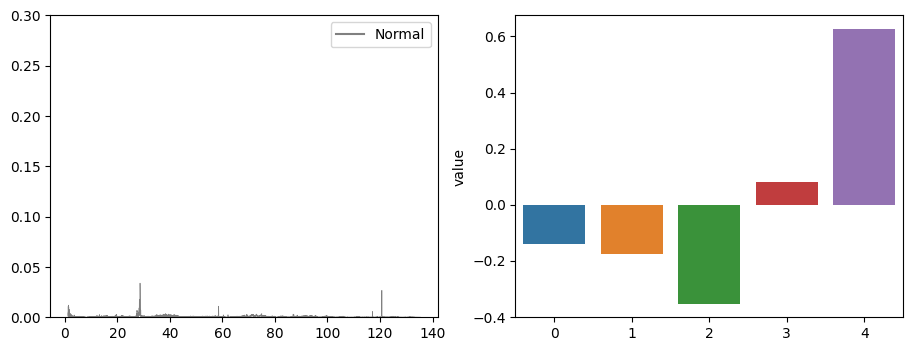

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from rpdbcs.datahandler.dataview import plotSpectrum


###Para ajustar o tamanho das figuras:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [11, 4]
#########

signal = D.getSignal(2)
plt.subplot(1,2,1) # 1 linha 2 colunas; primeira posição
plotSpectrum(signal)

encodding = triplet_net.transform(np.expand_dims(signal.freq.getY()[:6100], [0,1]))

df = pd.DataFrame({'value': encodding[0]}) # apenas para fazer o barplot bonito.
plt.subplot(1,2,2) # 1 linha 2 colunas; segunda posição
sns.barplot(data=df, x=df.index, y='value');


# Combine with classifiers (pre-trained)
Para fazer do triplet network um classificador, basta usar **Pipeline**:

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(1)

targets, targets_name = D.getMulticlassTargets()

classificador = Pipeline([('transformer',triplet_net),
                          ('classifier', knn)])

X2=np.expand_dims(X,1)
triplet_net.dont_train=True # Comente esse linha para treinar a partir do zero
classificador.fit(X2[:100], targets[:100]) # apenas os 100 primeiros exemplos
print(classificador.predict(X2[100:110])) # apenas 10 exemplos de teste.

[4 0 0 0 0 0 0 0 0 0]


# Cross-validation

No caso abaixo faremos 3-fold cross-validation estratificado para o treinamento do TripletNetwork usando poucas épocas. 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from tripletnet.networks import TripletNetwork, lmelloEmbeddingNet
from tripletnet.datahandler import BalancedDataLoader
import torch

metrics=['accuracy', 'f1_macro']

#Data:
X = D.asMatrix()[:,:6100]
targets, targets_name = D.getMulticlassTargets()
######

triplet_net = TripletNetwork(module=lmelloEmbeddingNet,module__num_outputs=8,
                            margin_decay_delay=5,
                            optimizer=torch.optim.Adam, optimizer__lr=1e-3, optimizer__weight_decay=1e-4,
                            device='cuda',
                            train_split=None,
                            batch_size=125, max_epochs=10,
                            criterion=TripletNetwork.OnlineTripletLossWrapper,
                            iterator_train=BalancedDataLoader, iterator_train__num_workers=3, iterator_train__pin_memory=True)
knn = KNeighborsClassifier(1)
classificador = Pipeline([('transformer',triplet_net),
                          ('classifier', knn)])

results = cross_validate(classificador, np.expand_dims(X,1), targets,
                       cv=3,
                       scoring=metrics)

print("f1 macro:", results['test_f1_macro'])

/home/lhsmello/ufes/NINFA/lmello_RPDBCS3/src/python/research/env_research/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


  epoch    train_loss     dur
-------  ------------  ------
      1        1.0000  0.1181
      2        1.0000  0.1053
      3        1.0000  0.1085
      4        1.0000  0.1167
      5        1.0000  0.1098
      6        0.7500  0.1146
      7        0.7500  0.1123
      8        0.7500  0.1089
      9        0.7500  0.1107
     10        0.7500  0.1120
  epoch    train_loss     dur
-------  ------------  ------
      1        1.0000  0.1130
      2        1.0000  0.1158
      3        1.0000  0.1163
      4        1.0000  0.1215
      5        1.0000  0.1187
      6        0.7500  0.1151
      7        0.7500  0.1192
      8        0.7500  0.1185
      9        0.7500  0.1166
     10        0.7500  0.1193
  epoch    train_loss     dur
-------  ------------  ------
      1        1.0000  0.1157
      2        1.0000  0.1236
      3        1.0000  0.1154
      4        1.0000  0.1190
      5        1.0000  0.1187
      6        0.7500  0.1187
      7        0.7500  0.1174
      8   

## Saving TripletNet
Just use `TripletNetwork.save_params(*)`.

# Custom Loss function

In [16]:
from tripletnet.losses import torch_cov
from siamese_triplet.utils import RandomNegativeTripletSelector # para seleção de exemplo que não estão separados uma margem ainda.
from torch import nn
import torch

def calculateTripletLoss(embeddings, triplets, margin): # Original triplet loss
    pivot = embeddings[triplets[:, 0]]
    positives = embeddings[triplets[:, 1]]
    negatives = embeddings[triplets[:, 2]]
    ap_distances = (pivot - positives).pow(2).sum(1)  # .pow(.5)
    an_distances = (pivot - negatives).pow(2).sum(1)  # .pow(.5)
    triplet_loss = nn.functional.relu(ap_distances - an_distances + margin)
    return triplet_loss.mean()


class MyCustomTripletLoss(nn.Module): # uses correlation matrix
    def __init__(self, margin, triplet_selector):
        super().__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):
        triplets = self.triplet_selector.get_triplets(embeddings, target)

        if embeddings.is_cuda:
            triplets = triplets.cuda()

        corr_loss = torch_cov(embeddings, correlation=True) # correlation matrix

        triplet_loss = calculateTripletLoss(embeddings, triplets, self.margin) # Original triplet loss

        return triplet_loss + 0.1*corr_loss
    
### Testing if it works ###
targets, _ = D.getMulticlassTargets()
labels = torch.tensor(targets[:100]) # only the first 100 signals
X_encodded = triplet_net.transform(np.expand_dims(X[:100],1)) # X_encodded is a matrix of 100 lines. Each line is a encodded signal.

margin = 1.0
my_loss = MyCustomTripletLoss(margin, RandomNegativeTripletSelector(margin))

loss = my_loss.forward(torch.tensor(X_encodded), labels)
print(loss) # use loss.item() to map from cuda to cpu.

tensor(0.9564)
